# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [26]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
88,24.71,5.85,Male,No,Thur,Lunch,2,0.310180,18.86
82,10.07,1.83,Female,No,Thur,Lunch,1,0.222087,8.24
157,25.00,3.75,Female,No,Sun,Dinner,4,0.176471,21.25
94,22.75,3.25,Female,No,Fri,Dinner,2,0.166667,19.50


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

# I-Modelo em 'tip'
### Criando a matriz de design (e a matriz y) utilizando o Patsy

In [3]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips)

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.64e-20
Time:                        17:54:57   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Removendo as variáveis não significantes.

In [4]:
y, X = patsy.dmatrices('tip ~ net_bill + 1', tips)
modelo2 = sm.OLS(y,X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 30 May 2022   Prob (F-statistic):           5.02e-23
Time:                        17:54:58   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Observando o gráfico de resíduos em função de net_bill

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 30 May 2022   Prob (F-statistic):           5.02e-23
Time:                        17:54:59   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

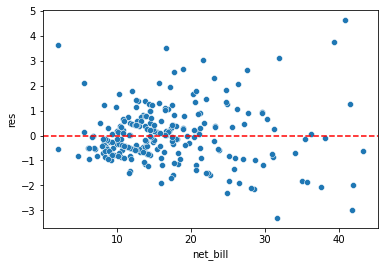

In [5]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
tips['res'] = reg.resid
print(reg.summary())
sns.scatterplot( x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [6]:
tips['pred_y'] = reg.fittedvalues
rn = round(tips[['pred_y', 'tip']].corr().iloc[0,1]**2,3)
print(('R² regressão normal = '),rn)

R² regressão normal =  0.333


### 4. Transformando net_bill no log e um polinômio para escolha do melhor modelo.

In [7]:
# log de net_bill
reg_logx = smf.ols('tip ~ np.log(net_bill)', data = tips).fit()
tips['res_logx'] = reg_logx.resid
#print(reg_logx.summary())
tips['pred_logx'] = reg_logx.fittedvalues
rlogx = round(tips[['pred_logx', 'tip']].corr().iloc[0,1]**2,3)
print(('R² log(x) = '),rlogx)

R² log(x) =  0.294


In [8]:
# Polinômio de net_bill
reg_px = smf.ols('tip ~ net_bill + np.power(net_bill,2)', data = tips).fit()
tips['res_px'] = reg_px.resid
#print(reg_px.summary())
tips['pred_px'] = reg_px.fittedvalues
rpx = round(tips[['pred_px', 'tip']].corr().iloc[0,1]**2,3)
print(('R² polinômio x = '),rpx)

R² polinômio x =  0.334


### Comparando os gráficos de resíduos

In [9]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,res,pred_y,res_logx,pred_logx,res_px,pred_px
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-1.90805,2.91805,-2.082188,3.092188,-1.946872,2.956872


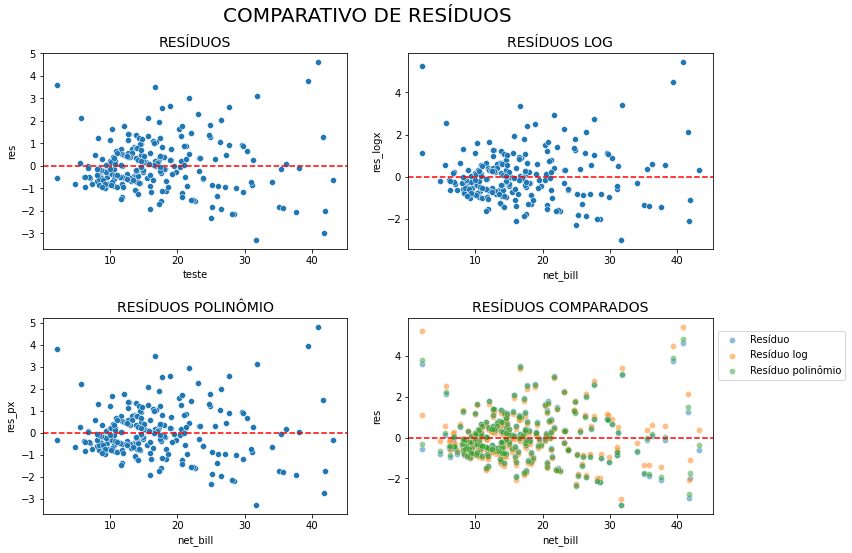

R² regressão normal =  0.333
R² log(x) =  0.294
R² polinômio x =  0.334


In [10]:
plt.figure(figsize = ((12, 8)))
plt.subplot(2, 2, 1)
plt.title("RESÍDUOS", fontsize = 14)
plt.xlabel('teste') # Eixo x 
sns.scatterplot( x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.subplot(2, 2, 2)
plt.title("RESÍDUOS LOG", fontsize = 14)
sns.scatterplot( x = 'net_bill', y = 'res_logx', data = tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.subplot(2, 2, 3)
plt.title("RESÍDUOS POLINÔMIO", fontsize = 14)
sns.scatterplot( x = 'net_bill', y = 'res_px', data = tips)
plt.axhline(y=0, color='r', linestyle='--')
plt.subplot(2, 2, 4)
plt.title("RESÍDUOS COMPARADOS", fontsize = 14)
sns.scatterplot( x = 'net_bill', y = 'res', data = tips,alpha=0.5)
sns.scatterplot( x = 'net_bill', y = 'res_logx', data = tips,alpha=0.5)
sns.scatterplot( x = 'net_bill', y = 'res_px', data = tips,alpha=0.5)
plt.legend(['Resíduo','Resíduo log','Resíduo polinômio'], fontsize=10,bbox_to_anchor=(1,0.96))
plt.axhline(y=0, color='r', linestyle='--')
plt.suptitle("COMPARATIVO DE RESÍDUOS", fontsize = 20)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()


print(('R² regressão normal = '),rn)
print(('R² log(x) = '),rlogx)
print(('R² polinômio x = '),rpx)

# II-Modelo no log de 'tip'

### Criando a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill

In [11]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 1', tips)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 30 May 2022   Prob (F-statistic):           1.21e-18
Time:                        17:55:02   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Removendo as variáveis não significantes

In [12]:
y, X = patsy.dmatrices('np.log(tip) ~ net_bill + 1', tips)
modelo2 = sm.OLS(y,X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.60e-21
Time:                        17:55:02   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Gerando o gráfico de resíduos em função de net_bill

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.60e-21
Time:                        17:55:03   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

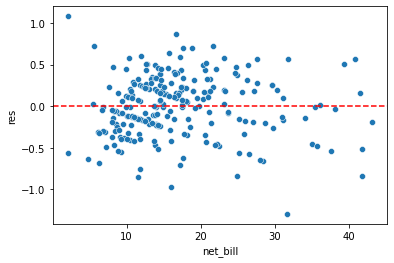

In [13]:
reg = smf.ols('np.log(tip) ~ net_bill', data = tips).fit()
tips['res'] = reg.resid
print(reg.summary())
sns.scatterplot( x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

tips['pred_y'] = reg.fittedvalues
tips['log_tip'] = np.log(tips['tip'])
rn2 = round(tips[['pred_y', 'log_tip']].corr().iloc[0,1]**2,3)
print(('\n R² regressão log(x) = '),rn2)

### Transformando net_bill no log e um polinômio

In [14]:
# log de net_bill
reg_logy = smf.ols('np.log(tip) ~ np.log(net_bill)', data = tips).fit()
tips['res_logy'] = reg_logy.resid
print(reg_logy.summary())

tips['pred_logy'] = reg_logy.fittedvalues
rlogy2 = round(tips[['pred_logy', 'log_tip']].corr().iloc[0,1]**2,3)
print(('R² log(x) + log(y) = '),rlogy2)

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 30 May 2022   Prob (F-statistic):           5.62e-22
Time:                        17:55:04   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

In [15]:
# Polinômio de net_bill
reg_px = smf.ols('np.log(tip) ~ net_bill + np.power(net_bill,2)', data = tips).fit()
tips['res_px'] = reg_px.resid
print(reg_px.summary())

tips['pred_px'] = reg_px.fittedvalues
rpx2 = round(tips[['pred_px', 'log_tip']].corr().iloc[0,1]**2,3)
print(('R² polinômio x + log(y) = '),rpx2)

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.82e-22
Time:                        17:55:05   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.18

### Comparando com o modelo do item 1

In [16]:
tipo = ['R² regressão normal','R² log(x)','R² polinômio x','R² regressão log(x)','R² log(x) + log(y)','R² polinômio x + log(y)']
r2 = [rn,rlogx,rpx,rn2,rlogy2,rpx2]

comparativo = pd.DataFrame((zip(tipo, r2)), columns = ['Modelo', 'R_quadrado']).sort_values(by='R_quadrado')
comparativo.set_index('Modelo',inplace=True)
comparativo

,R_quadrado
Modelo,
R² log(x),0.294
R² regressão log(x),0.311
R² log(x) + log(y),0.319
R² regressão normal,0.333
R² polinômio x,0.334
R² polinômio x + log(y),0.338


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [27]:
df = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv', sep=',')
df['data_ref'] = pd.to_datetime(df['data_ref'], format='%Y-%m-%d')
df.sample(3)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
1176,1176,2015-02-01,8821,F,True,True,1,Empresário,Secundário,União,Casa,31,2.210959,3.0,False,3644.16
9529,9529,2015-10-01,9875,F,False,True,0,Empresário,Superior completo,União,Casa,47,4.682192,2.0,False,6312.89
5979,5979,2015-06-01,15171,F,True,True,0,Pensionista,Secundário,Viúvo,Casa,64,NaN,1.0,False,3370.07


### 1. Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. 

In [28]:
reg_n = smf.ols('renda ~ tempo_emprego', data = df).fit()
tipo='REGRESSÃO NORMAL'
print(tipo.center(80))
print(reg_n.summary())
reg_n.summary()
df['res_n'] = reg_n.resid

                                REGRESSÃO NORMAL                                
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        08:38:19   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [22]:
reg_lx = smf.ols('renda ~ np.log(tempo_emprego)', data = df).fit()
tipo='FUNÇÃO LOGARITMICA(x)'
print(tipo.center(80))
print(reg_lx.summary())
df['res_logx'] = reg_lx.resid


                             FUNÇÃO LOGARITMICA(x)                              
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1123.
Date:                Mon, 30 May 2022   Prob (F-statistic):          7.66e-236
Time:                        17:09:34   Log-Likelihood:            -1.2301e+05
No. Observations:               12466   AIC:                         2.460e+05
Df Residuals:                   12464   BIC:                         2.460e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [23]:
reg_p = smf.ols('renda ~ tempo_emprego + np.power(tempo_emprego,2)', data = df).fit()
tipo='FUNÇÃO POLINÔMIO 2º GRAU'
print(tipo.center(80))
print(reg_p.summary())
df['res_poli'] = reg_p.resid

                            FUNÇÃO POLINÔMIO 2º GRAU                            
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1258.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        17:09:34   Log-Likelihood:            -1.2240e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12463   BIC:                         2.448e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [24]:
reg_ly = smf.ols('np.log(renda) ~ tempo_emprego', data = df).fit()
tipo='FUNÇÃO LOGARITMICA(Y)'
print(tipo.center(80))
print(reg_ly.summary())
df['res_logy'] = reg_ly.resid

                             FUNÇÃO LOGARITMICA(Y)                              
                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        17:09:36   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.792e+04
Df Residuals:                   12464   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

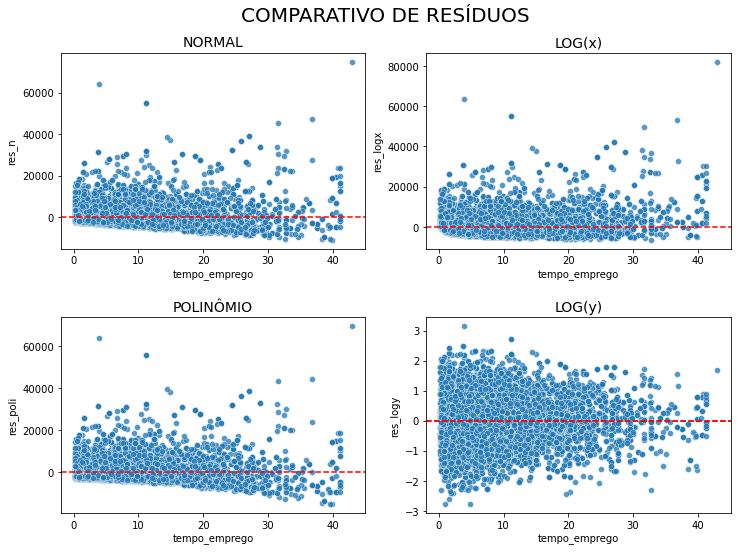

In [25]:
plt.figure(figsize = ((12, 8)))
plt.subplot(2, 2, 1)
plt.title("NORMAL", fontsize = 14)
sns.scatterplot(x = 'tempo_emprego', y = 'res_n', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.subplot(2, 2, 2)
plt.title("LOG(x)", fontsize = 14)
sns.scatterplot(x = 'tempo_emprego', y = 'res_logx', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.subplot(2, 2, 3)
plt.title("POLINÔMIO", fontsize = 14)
sns.scatterplot(x = 'tempo_emprego', y = 'res_poli', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.subplot(2, 2, 4)
plt.title("LOG(y)", fontsize = 14)
sns.scatterplot(x = 'tempo_emprego', y = 'res_logy', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='--')
plt.suptitle("COMPARATIVO DE RESÍDUOS", fontsize = 20)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

In [26]:
print(df.columns)

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda', 'res_n', 'res', 'res_logx',
       'res_poli', 'res_logy'],
      dtype='object')


In [27]:
reg_n = smf.ols('renda ~ tempo_emprego', data = df).fit()
tipo='REGRESSÃO NORMAL'

reg_lx = smf.ols('renda ~ np.log(tempo_emprego)', data = df).fit()
tipo='FUNÇÃO LOGARITMICA'

reg_p = smf.ols('renda ~ tempo_emprego + np.power(tempo_emprego,2)', data = df).fit()
tipo='FUNÇÃO POLINÔMIO 2º GRAU'

reg_ly = smf.ols('np.log(renda) ~ tempo_emprego', data = df).fit()
tipo='FUNÇÃO LOGARITMICA(Y)'

In [28]:
np.exp(reg.fittedvalues)

0      2.659388
1      2.132257
2      2.785416
3      3.037235
4      3.093823
         ...   
239    3.299814
240    3.513136
241    3.064934
242    2.666641
243    2.643340
Length: 244, dtype: float64

In [29]:
df['pred'] = reg_n.fittedvalues
rn = df[['pred', 'renda']].corr().iloc[0,1]
df['pred'] = reg_lx.fittedvalues
rx = df[['pred', 'renda']].corr().iloc[0,1]
df['pred'] = reg_p.fittedvalues
rp = df[['pred', 'renda']].corr().iloc[0,1]
df['pred'] = reg_ly.fittedvalues
ry = df[['pred', 'renda']].corr().iloc[0,1]



print(('R² regressão normal = '),round(rn**2,3))
print(('R² log(x) = '),round(rx**2,3))
print(('R² polinômio = '),round(rp**2,3))
print(('R² log(y) = '),round(ry**2,3))


R² regressão normal =  0.155
R² log(x) =  0.083
R² polinômio =  0.168
R² log(y) =  0.155


### 2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.60e-21
Time:                        17:10:03   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

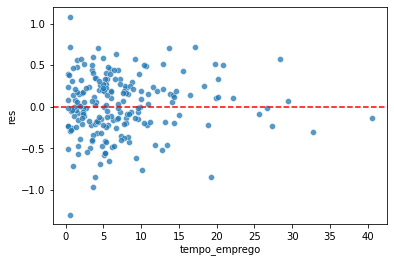

In [30]:
df['res'] = reg.resid
plt.rc('figure', figsize=(6, 4))
print(reg.summary())
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

### 3. Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.

In [31]:
y, X = patsy.dmatrices('renda ~ tempo_emprego + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia +                  + tipo_renda + sexo + posse_de_imovel + idade + tipo_renda + educacao + 1', df)

modelo = sm.OLS(y,X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        17:10:12   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12441   BIC:                         2.442e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

### 4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

In [32]:
y, X = patsy.dmatrices('renda ~ tempo_emprego + sexo + posse_de_imovel + idade + 1', df)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     813.7
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        17:10:20   Log-Likelihood:            -1.2210e+05
No. Observations:               12466   AIC:                         2.442e+05
Df Residuals:                   12461   BIC:                         2.442e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 455.8353    186.029      2.450      0.014      91.190     820.481
sexo[T.M]                2299.6921     82.355     27.924      0.000    2138.263    2461.121
posse_de_imovel[T.True]   434.8417     81.921      5.308      0.000     274.264     595.420
tempo_emprego             296.2532      6.097     48.586      0.000     284.301     308.205
idade                      24.3007      4.427      5.489      0.000      15.623      32.979
==============================================================================
Omnibus:                    10139.758   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           439131.435
Skew:                           3.612   Prob(JB):                         0.00
Kurtosis:                      31.165   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.60e-21
Time:                        17:10:29   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

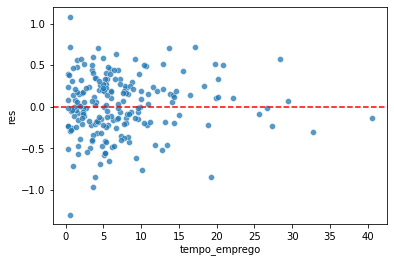

In [33]:
df['res'] = reg.resid
plt.rc('figure', figsize=(6, 4))
print(reg.summary())
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')